In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

#updated below function so that it will only take in the first 3 min for calculations...
def calculate_frame_brightness(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    frame_brightness = []
    frame_number = 0
    max_frames = 5400
    
    while frame_number < max_frames:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Calculate the average brightness
        avg_brightness = np.mean(gray_frame)
        frame_brightness.append(avg_brightness)
        
        frame_number += 1
    
    cap.release()
    return frame_brightness, frame_number

def find_brightness_drop(brightness_values, threshold):
    drops = []
    for i in range(1, len(brightness_values)): 
        if brightness_values[i-1] - brightness_values[i] > threshold:
            drops.append(i)
    return drops

def process_webcam(base_path, avis, threshold):
    # Combine video files
    all_frames = []
    total_frames = 0
    for video_file in avis:
        video_path = os.path.join(base_path, video_file)
        brightness_values, frame_count = calculate_frame_brightness(video_path)
        all_frames.extend(brightness_values)
        total_frames += frame_count

    # Find drop frames
    drop_frames = find_brightness_drop(all_frames, threshold)

    # Plot brightness
    plt.plot(all_frames[:total_frames], label="Combined Videos")  # Plot only relevant frames
    plt.title('Frame Brightness Over Time')
    plt.xlabel('Frame Number (first 3 min)')
    plt.ylabel('Average Brightness')
    plt.legend()
    plt.show()

    # Adjust frame numbers for drop locations based on total frames
    adjusted_drops = [frame + sum(frame_count for avi in avis[:i]) for i, frame in enumerate(drop_frames)]

    return {f"Combined ({','.join(avis)})": adjusted_drops}


def find_timestamp_position(timestamps, target_time_seconds):
  """
  Finds the position of a timestamp closest to a target time in a list.

  Args:
      timestamps: A list of timestamps in seconds.
      target_time_seconds: The target time in seconds to search for.

  Returns:
      The index of the timestamp closest to the target time (or -1 if not found).
  """

  # Convert target time to milliseconds for consistency (optional)
  target_time_ms = target_time_seconds * 1000  # Uncomment if timestamps are in milliseconds

  # Initialize variables
  closest_time_diff = float('inf')  # Positive infinity
  closest_index = -1

  for index, timestamp in enumerate(timestamps):
    # Calculate time difference
    time_diff = abs(timestamp - target_time_seconds)

    # Update closest index if time difference is smaller
    if time_diff < closest_time_diff:
      closest_time_diff = time_diff
      closest_index = index
      cloest_timestamp = timestamp
    #   print('timestamp',timestamp, 'closest_index', index)

  return closest_index, cloest_timestamp

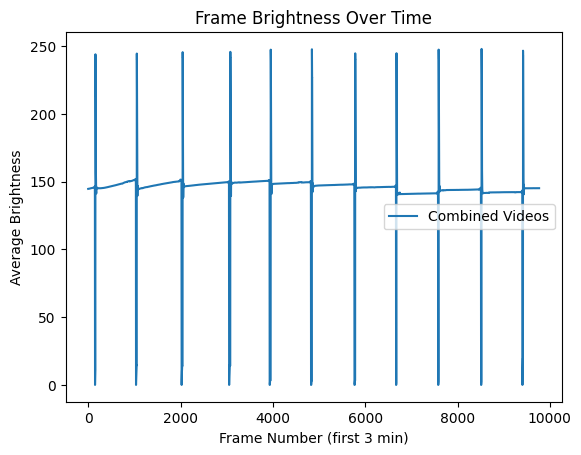

Detected drop frames: {'Combined (0.avi,1.avi,2.avi,3.avi,4.avi,5.avi,6.avi,7.avi,8.avi,9.avi)': [146, 1802, 2571, 4326, 6123, 7769, 8538, 10201, 11910, 13580, 15258, 15259, 16188, 17084, 17085]}


In [37]:
# Define base path and camera list
#base_path for webcam
base_path = '/hpc/group/tdunn/lq53/sync_camera_/2024_06_26_miniscope_test/Dr_JN/Experiment0/Mouse_X/OpenFieldRecording_X/2024_06_26/19_45_23/My_WebCam'
#'/hpc/group/tdunn/lq53/miniscope_vid_transfer/240603_rec/20240506PMC1-left/Fully_Ball/customEntValHere/2024_06_03/15_28_49/My_Second_WebCam'
threshold = 50  # Adjust this threshold if needed
avis = [f'{i}.avi' for i in range(0, 10)]  # 2, 7 if camera 1 is dead

drop_frames = process_webcam(base_path, avis, threshold)
print("Detected drop frames:", drop_frames)

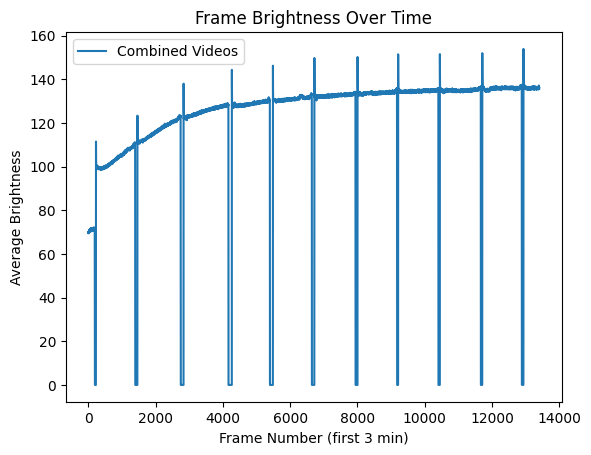

Detected drop frames: {'Combined (0.avi,1.avi,2.avi,3.avi,4.avi,5.avi,6.avi,7.avi,8.avi,9.avi,10.avi,11.avi,12.avi,13.avi)': [192, 1797, 3553, 5377, 7012, 7417, 9068, 10769, 12408, 12813, 14445, 14850, 16515, 18136, 18541]}


In [36]:
# Define base path and camera list
#base_path for webcam
base_path = '/hpc/group/tdunn/lq53/sync_camera_/2024_06_26_miniscope_test/Dr_JN/Experiment0/Mouse_X/OpenFieldRecording_X/2024_06_26/19_45_23/My_V4_Miniscope'
#'/hpc/group/tdunn/lq53/miniscope_vid_transfer/240603_rec/20240506PMC1-left/Fully_Ball/customEntValHere/2024_06_03/15_28_49/My_Second_WebCam'
threshold = 50  # Adjust this threshold if needed
avis = [f'{i}.avi' for i in range(0, 14)]  # 2, 7 if camera 1 is dead

drop_frames = process_webcam(base_path, avis, threshold)
print("Detected drop frames:", drop_frames)

In [27]:
# drop_frames = {'Combined (0.avi,1.avi,2.avi,3.avi,4.avi,5.avi)': [146, 2034, 3035, 5022, 7051, 8929, 9930, 10825, 11766]}
keyieie = 'Combined (0.avi,1.avi,2.avi,3.avi,4.avi,5.avi)'

drop_frames[keyieie][0] #the 6cameras are synced by this, starting from this.

146

In [28]:
import csv

def load_timestamps(csv_path):
    timestamps = []
    with open(csv_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip header row
        for row in reader:
            frame_number, timestamp_ms, _ = row
            timestamps.append(int(timestamp_ms))
    return timestamps

timestamps_webcam_path =os.path.join(base_path, 'timeStamps.csv')
timestamps_webcam = load_timestamps(timestamps_webcam_path)

In [29]:
timestamps_webcam[drop_frames[keyieie][0]] #note that fram number starts from 0 so this works...

9710

In [30]:
timestamp_fordroppedframe = timestamps_webcam[drop_frames[keyieie][0]] #note that fram number starts from 0 so this works...

In [31]:
miniscope_timestamp_path = '/hpc/group/tdunn/lq53/sync_camera_/2024_06_26_miniscope_test/Dr_JN/Experiment0/Mouse_X/OpenFieldRecording_X/2024_06_26/19_45_23/My_V4_Miniscope/timeStamps.csv'
miniscope_timestamp = load_timestamps(miniscope_timestamp_path)


In [33]:
closest_index, cloest_timestamp = find_timestamp_position(miniscope_timestamp, timestamp_fordroppedframe)

In [34]:
closest_index #cool it works!

192

In [35]:
cloest_timestamp

9721

In [48]:
# seems like 0.avi has 1000 frames for each videos...
# base_path = '/hpc/group/tdunn/lq53/miniscope_vid_transfer/240603_rec/20240506PMC1-left/My_V4_Miniscope'
base_path = '/hpc/group/tdunn/lq53/miniscope_vid_transfer/240603_rec/20240506PMC1-left/Fully_Ball/customEntValHere/2024_06_03/15_28_49/My_Second_WebCam'

ppp = os.path.join(base_path, '0.avi')

frame_brightness, fn = calculate_frame_brightness(ppp)

fn

1000